In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# main filter based on days
kpi_data = [
    {"img": "/assets/img/channel-icon.png", "name": "No. of Youtube Channels", "usa_value": "10223", "ind_value": "10223"},
    {"img": "/assets/img/trending-video.png", "name": "No. of Trending Videos", "usa_value": "10223", "ind_value": "10223"},
    {"img": "/assets/img/social-engagement.png", "name": "No. of Total Engagements", "usa_value": "2345", "ind_value": "1023"},
    {"img": "/assets/img/engagement-per-video.png", "name": "Avg. Engagement/ video", "usa_value": "124", "ind_value": "123"},
    {"img": "/assets/img/publish-rate.png", "name": "Avg. Content Publishing/ Day", "usa_value": "30%", "ind_value": "20%"},
    {"img": "/assets/img/avg-trending.png", "name": "Avg. Time taken to Trend", "usa_value": "45%", "ind_value": "30%"}
]

In [5]:
def read_data():
    # current working directory
    cwd = os.getcwd()
    
    # load the dataframes
    data_path = os.path.join(cwd, "data")
    india_df = pd.read_csv(os.path.join(data_path, "india_ytb_data.csv"))
    usa_df = pd.read_csv(os.path.join(data_path, "usa_ytb_data.csv"))
    category_df = pd.read_csv(os.path.join(data_path, "category_id.csv"))

    # Merge the categories
    cat_df = category_df[["id", "snippet/title"]]
    india_df = india_df.merge(cat_df, how="left", left_on="category_id", right_on="id")
    usa_df = usa_df.merge(cat_df, how="left", left_on="category_id", right_on="id")

    return usa_df, india_df

In [6]:
def get_links(txt):
    myregex = r'(?:[a-zA-Z0-9](?:[a-zA-Z0-9\-]{,61}[a-zA-Z0-9])?\.)+[a-zA-Z]{2,6}'
    url_list = re.findall(myregex, txt)

    return url_list

def check(string, sub_str):
    if (string.find(sub_str) == -1):
        return 0
    else:
        return 1

def url_data_for_promotion_analysis(df, col_name):
    final_data = []
    for txt in df[col_name]:
        try:
            url_list = get_links(txt)
        except TypeError:
            pass
        data = {"Facebook": 0, "Instagram": 0, "Twitter": 0, "Youtube": 0, "Google": 0, "Others": 0}
        for url in url_list:
            if check(url, "fb"):
                data["Facebook"] = data["Facebook"] + 1 
            elif check(url, "instagram"):
                data["Instagram"] = data["Instagram"] +1 
            elif check(url, "twitter"):
                data["Twitter"] = data["Twitter"] +1 
            elif check(url, "goo.gl"):
                data["Google"] = data["Google"] + 1
            elif check(url, "youtube"):
                data["Youtube"] = data["Youtube"] + 1
            elif check(url, "youtube"):
                data["Youtube"] = data["Youtube"] + 1 
            else:
                data["Others"] = data["Others"] + 1 
        final_data.append(data)

    return pd.DataFrame(final_data)

In [43]:
usa_df, ind_df = read_data()

In [45]:
usa_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,id,snippet/title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",24,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,23,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,24,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,24,Entertainment


In [46]:
usa_df.shape

(40949, 18)

In [ ]:
def generate_cols_for_temperature_analysis(df):
    df["sequential"] = df.groupby('video_id').cumcount()+1
    age_df = df.groupby(["video_id"]).agg({"views":np.max, "likes":np.max , "comment_count":np.max , "dislikes":np.max , "sequential": np.max}).reset_index()
    age_df.rename(columns={"views": "total_view", "likes": "total_likes", "comment_count": "total_comment", "dislikes": "total_dislikes", "sequential": "age_in_days"}, inplace=True)
    age_df["views_per_hr"] = age_df["total_view"]/(age_df["age_in_days"]*8)
    age_df["likes_per_hr"] = age_df["total_likes"]/(age_df["age_in_days"]*8)
    age_df["comment_per_hr"] = age_df["total_comment"]/(age_df["age_in_days"]*8)
    age_df["dislikes_per_hr"] = age_df["total_dislikes"]/(age_df["age_in_days"]*8)

    # Dropping the duplicate - analysing only at the time of trending
    df.drop_duplicates(subset=['video_id'], inplace=True)
    df.drop(usa_df[usa_df["video_id"] == "#NAME?"].index, inplace=True)
    df.drop(usa_df[usa_df["video_id"] == "#VALUE!"].index, inplace=True)

    # Merge the age & temperature data
    final_df = df.merge(age_df, how='left', on='video_id')

    return final_df

In [47]:
usa_df["sequential"] = usa_df.groupby('video_id').cumcount()+1

In [48]:
usa_df.shape

(40949, 19)

In [49]:
usa_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,id,snippet/title,sequential
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs,1
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",24,Entertainment,1
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,23,Comedy,1
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,24,Entertainment,1
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,24,Entertainment,1


In [50]:
usa_df.loc[usa_df["video_id"] == "2kyS6SvSYSE"]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,id,snippet/title,sequential
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs,1
217,2kyS6SvSYSE,17.15.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2188590,88099,7150,24225,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs,2
448,2kyS6SvSYSE,17.16.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2325233,91111,7543,21450,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs,3
689,2kyS6SvSYSE,17.17.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2400741,92831,7687,21714,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs,4
924,2kyS6SvSYSE,17.18.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2468267,94303,7802,21866,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs,5
1159,2kyS6SvSYSE,17.19.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2524854,95587,7892,22038,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs,6
1383,2kyS6SvSYSE,17.20.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2564903,96321,7972,22149,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs,7


In [51]:
age_df = usa_df.groupby(["video_id"]).agg({"views":np.max, "likes":np.max , "comment_count":np.max , "dislikes":np.max , "sequential": np.max}).reset_index()
age_df.rename(columns={"views": "total_view", "likes": "total_likes", "comment_count": "total_comment", "dislikes": "total_dislikes", "sequential": "age_in_days"}, inplace=True)
age_df.head()

,video_id,total_view,total_likes,total_comment,total_dislikes,age_in_days
0,-0CMnp02rNY,800359,9773,423,332,6
1,-0NYY8cqdiQ,563746,4429,94,54,1
2,-1Hm41N0dUs,2058516,41248,1490,580,3
3,-1yT-K3c6YI,231341,7734,846,212,4
4,-2RVw2_QyxQ,71089,460,23,27,3


In [52]:
age_df.shape

(6351, 6)

In [55]:
age_df["views_per_hr"] = age_df["total_view"]/(age_df["age_in_days"]*8)
age_df["likes_per_hr"] = age_df["total_likes"]/(age_df["age_in_days"]*8)
age_df["comment_per_hr"] = age_df["total_comment"]/(age_df["age_in_days"]*8)
age_df["dislikes_per_hr"] = age_df["total_dislikes"]/(age_df["age_in_days"]*8)

In [56]:
age_df.head()

,video_id,total_view,total_likes,total_comment,total_dislikes,age_in_days,views_per_hr,likes_per_hr,comment_per_hr,dislikes_per_hr
0,-0CMnp02rNY,800359,9773,423,332,6,16674.145833,203.604167,8.812500,6.916667
1,-0NYY8cqdiQ,563746,4429,94,54,1,70468.250000,553.625000,11.750000,6.750000
2,-1Hm41N0dUs,2058516,41248,1490,580,3,85771.500000,1718.666667,62.083333,24.166667
3,-1yT-K3c6YI,231341,7734,846,212,4,7229.406250,241.687500,26.437500,6.625000
4,-2RVw2_QyxQ,71089,460,23,27,3,2962.041667,19.166667,0.958333,1.125000


In [57]:
age_df.shape

(6351, 10)

In [27]:
np.mean(age_df["views"]/(age_df["sequential"]*8))

38873.82705323992

In [58]:
usa_df.drop_duplicates(subset=['video_id'], inplace=True)
usa_df.drop(usa_df[usa_df["video_id"] == "#NAME?"].index, inplace=True)
usa_df.drop(usa_df[usa_df["video_id"] == "#VALUE!"].index, inplace=True)

In [59]:
usa_df.shape

(6351, 19)

In [60]:
final_df = usa_df.merge(age_df, how='left', on='video_id')

In [61]:
final_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'id', 'snippet/title',
       'sequential', 'total_view', 'total_likes', 'total_comment',
       'total_dislikes', 'age_in_days', 'views_per_hr', 'likes_per_hr',
       'comment_per_hr', 'dislikes_per_hr'],
      dtype='object')

In [62]:
def  clean_create_neccessary_columns(df):
    # Dropping the duplicate - analysing only at the time of trending
    df.drop_duplicates(subset=['video_id'], inplace=True)
    df.drop(df[df["video_id"] == "#NAME?"].index, inplace=True)
    df.drop(df[df["video_id"] == "#VALUE!"].index, inplace=True)

    df = df.copy()

    # Create additional columns
    
    df["TrendingDate"] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
    df["PublishTime"] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
    df["TrendingTimeTaken"] = (df['TrendingDate'] - df['PublishTime']).dt.total_seconds() / 60 / 60
    df["trending_time_taken"] = df["TrendingTimeTaken"].abs()
    df["publish_date"] = df['PublishTime'].dt.strftime('%d-%m-%Y')
    df["publish_weekday"] = df['PublishTime'].dt.day_name()
    df["publish_hour"] = df['PublishTime'].dt.hour
    df["publish_month"] = df['PublishTime'].dt.month_name()
    df["sequential"] = df.groupby('video_id').cumcount()+1
    df["engagement"] = df["likes"] + df["dislikes"] + df["comment_count"]
    df['title_length'] = df['title'].str.len()
    df['desc_length'] = df['description'].str.len()
    df['num_tags'] = df['tags'].apply(lambda x: len(x.split('|')) if x != '[none]' else 0)
    df['tags_length'] = df['tags'].apply(lambda x: len(x.replace('|', '')) if x != '[none]' else 0)
    df["video_age"] = 1

    # Create columns for promotional analysis
    url_df = url_data_for_promotion_analysis(df=df, col_name='description')
    df = pd.merge(df, url_df, left_index=True, right_index=True)

    return df

In [63]:
test_df = clean_create_neccessary_columns(df=usa_df)

In [66]:
test_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'id', 'snippet/title',
       'sequential', 'TrendingDate', 'PublishTime', 'TrendingTimeTaken',
       'trending_time_taken', 'publish_date', 'publish_weekday',
       'publish_hour', 'publish_month', 'engagement', 'title_length',
       'desc_length', 'num_tags', 'tags_length', 'video_age', 'Facebook',
       'Instagram', 'Twitter', 'Youtube', 'Google', 'Others'],
      dtype='object')

In [65]:
test_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,desc_length,num_tags,tags_length,video_age,Facebook,Instagram,Twitter,Youtube,Google,Others
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,1410.0,1,15,1,0,1,1,1,0,20
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,630.0,4,99,1,0,0,0,1,0,3
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,1177.0,23,292,1,0,2,1,15,0,1
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,1403.0,27,451,1,0,1,1,3,1,15
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,636.0,14,107,1,0,1,1,1,0,4


In [67]:
test_df["PublishTime"]

0      2017-11-13 17:13:01
1      2017-11-13 07:30:00
2      2017-11-12 19:05:24
3      2017-11-13 11:00:04
4      2017-11-12 18:01:41
               ...        
6309   2017-12-14 03:25:57
6322   2017-12-13 17:42:42
6331   2017-12-12 20:44:40
6332   2017-12-13 16:48:25
6344   2017-12-13 03:58:29
Name: PublishTime, Length: 1589, dtype: datetime64[ns]

In [73]:
from datetime import timedelta

In [75]:
max_date = test_df['PublishTime'].agg(['max'])

In [79]:
subtracted_date = pd.to_datetime(max_date) - timedelta(days=180)

In [85]:
subtracted_date["max"]

Timestamp('2017-06-18 00:29:24')

In [78]:
max_date

max   2017-12-15 00:29:24
Name: PublishTime, dtype: datetime64[ns]

In [84]:
test_df['publish_date']

0       13-11-2017
1       13-11-2017
2       12-11-2017
3       13-11-2017
4       12-11-2017
           ...    
6309    14-12-2017
6322    13-12-2017
6331    12-12-2017
6332    13-12-2017
6344    13-12-2017
Name: publish_date, Length: 1589, dtype: object

In [87]:
test_df.loc[test_df['PublishTime'] >= subtracted_date["max"]]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,desc_length,num_tags,tags_length,video_age,Facebook,Instagram,Twitter,Youtube,Google,Others
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,1410.0,1,15,1,0,1,1,1,0,20
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,630.0,4,99,1,0,0,0,1,0,3
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,1177.0,23,292,1,0,2,1,15,0,1
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,1403.0,27,451,1,0,1,1,3,1,15
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,636.0,14,107,1,0,1,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6309,1PhdQdJjDZc,17.15.12,Predators' Subban scores fluttering goal after...,SPORTSNET,17,2017-12-14T03:25:57.000Z,"anders nilsson|""youtube""|""hockey""|""nashville p...",11148,55,3,...,184.0,10,122,1,0,0,0,0,0,9
6322,7l2NnC0MNt4,17.15.12,"'Riverdale' S2E09 'Silent Night, Deadly Night'...",Entertainment Tonight,24,2017-12-13T17:42:42.000Z,"varchie|""et""|""et online""|""et tonight""|""archie ...",39399,1063,11,...,290.0,39,437,1,0,0,0,0,0,0
6331,So_guHTJ4Ng,17.15.12,Matt Damon and the Hemsworth Brothers Run into...,LIVEKellyandRyan,24,2017-12-12T20:44:40.000Z,"kelly ripa|""chris hemsworth""|""live with kelly ...",11325,83,4,...,133.0,6,104,1,0,1,1,0,0,4
6332,GpekGi00XCE,17.15.12,LOOKBOOK | Christmas & New Year's Eve | Hannah...,Hannah Witton,22,2017-12-13T16:48:25.000Z,"lookbook|""look book""|""christmas""|""new year""|""n...",25780,3157,27,...,1840.0,23,222,1,0,0,0,0,0,15


In [88]:
test_df.shape

(1589, 39)

In [20]:
def kpi_analysis(df):
    no_of_ytb_channels = df["channel_title"].nunique()
    no_of_trending_videos = df["video_id"].nunique()
    total_engagement = df["engagement"].sum()
    avg_video_engagement = int(df["engagement"].mean())
    avg_no_of_video_published_in_day = int(pd.DataFrame(df.groupby(["publish_date"])["video_id"].count().reset_index())["video_id"].mean())
    avg_no_of_time_video_trends = int(df.groupby(["video_id"]).agg({"video_age": sum}).reset_index()["video_age"].mean())

    x = [no_of_ytb_channels, no_of_trending_videos, total_engagement, avg_video_engagement, avg_no_of_video_published_in_day, avg_no_of_time_video_trends]
    
    return x

def update_kpi_data(country_val, update_data, default_kpi_data):
    for ind_, kpi_data in enumerate(default_kpi_data):
        default_kpi_data[ind_][country_val] = update_data[ind_]

    return default_kpi_data

def get_kpi_data(usa_df, ind_df, default_kpi_data):
    usa_x = kpi_analysis(usa_df)
    ind_x = kpi_analysis(ind_df)

    default_kpi_data = update_kpi_data(country_val="usa_value", update_data=usa_x, default_kpi_data=default_kpi_data)
    updated_kpi_data = update_kpi_data(country_val="ind_value", update_data=ind_x, default_kpi_data=default_kpi_data)

    return updated_kpi_data

In [21]:
usa_df, india_df = read_data()
cleaned_usa_df = clean_create_neccessary_columns(df=usa_df)
cleaned_ind_df = clean_create_neccessary_columns(df=india_df)

In [22]:
cleaned_usa_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,desc_length,num_tags,tags_length,video_age,Facebook,Instagram,Twitter,Youtube,Google,Others
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,1410.0,1,15,1,0,1,1,1,0,20
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,630.0,4,99,1,0,0,0,1,0,3
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,1177.0,23,292,1,0,2,1,15,0,1
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,1403.0,27,451,1,0,1,1,3,1,15
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,636.0,14,107,1,0,1,1,1,0,4


In [23]:
cleaned_usa_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'id', 'snippet/title',
       'TrendingDate', 'PublishTime', 'TrendingTimeTaken',
       'trending_time_taken', 'publish_date', 'publish_weekday',
       'publish_hour', 'publish_month', 'sequential', 'engagement',
       'title_length', 'desc_length', 'num_tags', 'tags_length', 'video_age',
       'Facebook', 'Instagram', 'Twitter', 'Youtube', 'Google', 'Others'],
      dtype='object')

In [29]:
data = cleaned_usa_df[['views', 'likes', 'dislikes', 'comment_count', 'num_tags',
                   'tags_length', 'title_length', 'desc_length', 'publish_hour']]
correlation_matrix = data.corr()

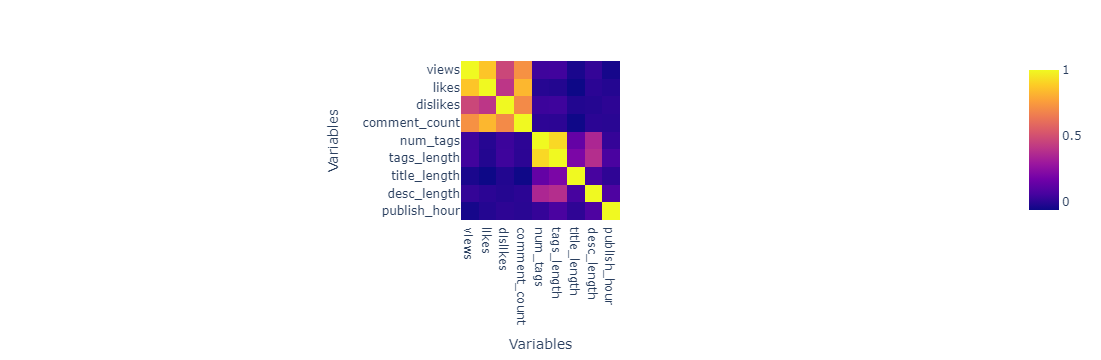

In [35]:
# Create a correlation heatmap using Plotly Express
heatmap = px.imshow(correlation_matrix)

# Customize the figure's layout
heatmap.update_layout(
    plot_bgcolor='#1c2039',  # Set the background color
    xaxis_title="Variables",
    yaxis_title="Variables",
)

heatmap

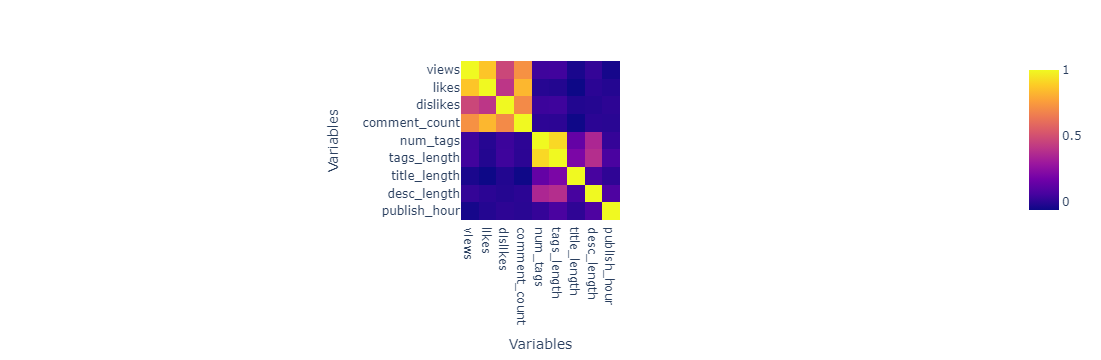

In [34]:
heatmap

In [15]:
def plot_conf(ax, xlbl='', ylbl='', t='', back_color='#ffffff',
              text_color='#616161', grid_color='#e9e9e9', 
              tick_color='', ticklbl_size=9, lbl_size=11, lang='en'):
    """
    This function perform operations to produce better-looking 
    visualizations
    """
    # changing the background color of the plot
    ax.set_facecolor(back_color)
    # modifying the ticks on plot axes
    ax.tick_params(axis='both', labelcolor=text_color, color=back_color)
    if tick_color != '':
        ax.tick_params(axis='both', color=tick_color)
    ax.tick_params(axis='both', which='major', labelsize=ticklbl_size)
    # adding a grid and specifying its color
    ax.grid(True, color=grid_color)
    # making the grid appear behind the graph elements
    ax.set_axisbelow(True)
    # hiding axes
    ax.spines['bottom'].set_color(back_color)
    ax.spines['top'].set_color(back_color) 
    ax.spines['right'].set_color(back_color)
    ax.spines['left'].set_color(back_color)
    # setting the title, x label, and y label of the plot
    if lang == 'ar':
        ax.set_title(get_display(reshaper.reshape(t)), fontweight='bold', family='Amiri',
                     fontsize=14, color=text_color, loc='right', pad=24);
        ax.set_xlabel(get_display(reshaper.reshape(xlbl)), fontweight='bold', family='Amiri',
                      labelpad=16, fontsize=lbl_size, color=text_color, fontstyle='italic');
        ax.set_ylabel(get_display(reshaper.reshape(ylbl)), fontweight='bold', family='Amiri',
                      color=text_color, labelpad=16, fontsize=lbl_size, fontstyle='italic');
    else:
        ax.set_title(t, fontsize=14, color='#616161', loc='left', pad=24, fontweight='bold');
        ax.set_xlabel(xlbl, labelpad=16, fontsize=lbl_size, color='#616161', fontstyle='italic');
        ax.set_ylabel(ylbl, color='#616161', labelpad=16, fontsize=lbl_size, fontstyle='italic');

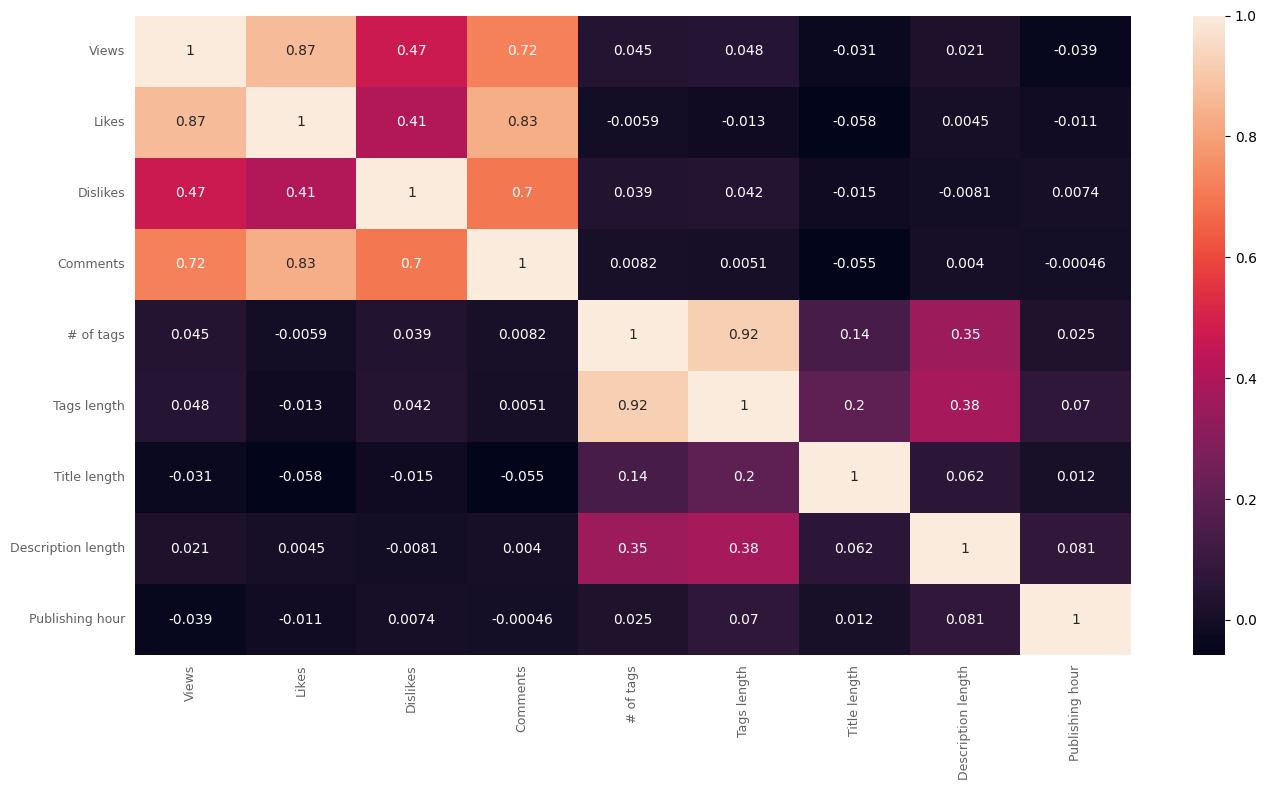

In [18]:
heatmap_columns = ['views', 'likes', 'dislikes', 'comment_count', 'num_tags',
                   'tags_length', 'title_length', 'desc_length', 'publish_hour']

h_labels = ['Views', 'Likes', 'Dislikes', 'Comments', '# of tags', 'Tags length', 
            'Title length', 'Description length', 'Publishing hour']

fig, ax = plt.subplots(figsize=(14,8))
sns.heatmap(cleaned_usa_df[heatmap_columns].corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels)
plot_conf(ax)
plt.tight_layout()
plt.savefig('assets/img/yta2-corr.png', dpi=300)

In [8]:
cleaned_usa_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'id', 'snippet/title',
       'TrendingDate', 'PublishTime', 'TrendingTimeTaken',
       'trending_time_taken', 'publish_date', 'publish_weekday',
       'publish_hour', 'publish_month', 'sequential', 'engagement',
       'video_age'],
      dtype='object')

In [9]:
category_data = pd.DataFrame(cleaned_usa_df.groupby(["snippet/title"])["video_id"].count().sort_values(ascending=False).reset_index())[0:10]

In [22]:
cleaned_usa_df.groupby(["channel_title"])["video_id"].count().reset_index().sort_values(by="video_id",ascending=False)

,channel_title,video_id
551,ESPN,84
1796,TheEllenShow,74
1778,The Tonight Show Starring Jimmy Fallon,72
884,Jimmy Kimmel Live,70
1746,The Late Show with Stephen Colbert,58
...,...,...
899,JonTronShow,1
898,Jon Olsson,1
896,JohnnyQ90,1
895,Johnny Jansen,1


In [12]:
channel_data

,channel_title,video_id
0,ESPN,84
1,TheEllenShow,74
2,The Tonight Show Starring Jimmy Fallon,72
3,Jimmy Kimmel Live,70
4,The Late Show with Stephen Colbert,58
5,Netflix,58
6,NBA,55
7,CNN,52
8,Vox,47
9,The Late Late Show with James Corden,46


In [44]:
txt = "This video showcases the difference between people who speak in English and Tamil in a very funny way.\nSubscribe to our YouTube Channel\nCatch our updates on our social media pages:\nwww.fb.com/ErumaShit\nwww.twitter.com/Eruma_Saani\nwww.instagram.com/ErumaSaani"

In [30]:
txt = "Watch Stylish Star Allu Arjun @ ChaySam Wedding Reception \n\nâ˜› For latest news https://www.tfpc.in,  https://goo.gl/pQjhVq\nâ˜› Follow Us on https://twitter.com/tfpcin\nâ˜› Like Us on https://www.facebook.com/tfpcin\nâ˜› Follow us on https://instagram.com/tfpcin/\n\nâ–º Latest Telugu Cinema Celebrities Interview https://goo.gl/08Kpy2 \n\nâ–º Latest Comedy Scenes https://goo.gl/SNtjdj\n\nâ–º Latest Telugu Cinema Making Videos https://goo.gl/42X3cD\n\nâ–º Latest Trailer  https://goo.gl/ugX9oT"

In [77]:
txt = "why Samantha became EMOTIONAL @ Samantha naga chaithanya marriage Reception | Filmylooks #samantha #Nagachaithanya \n\nFilmy Looks is the celebrated hub of our Tollywood Industry. Its All about Movies. Get latest videos on your favourite Tollywood celebrities and catch them on all the events around you. \n\nSubscribe and stay connected to view Updates on TELUGU CINEMA......\n\nEnjoy & Have Fun!\n#Filmylooks\n\nSubscribe Filmylookslive on youtube  :  https://goo.gl/AUM3Ue\nLike Filmylooks on fb  : fb.com/filmylooks\nFollow Filmylooks on twitter  : twitter.com/filmylooks\nFollow Filmylooks on Google + : https://goo.gl/bgnTgy\n\nWatch Latest Telugu Trailers Here : https://www.youtube.com/watch?v=C6W53j8ijZo&list=PLrl_iHW-uUsl5jnQg-KbcTtc9YXDbXWCk"

In [78]:
txt

'why Samantha became EMOTIONAL @ Samantha naga chaithanya marriage Reception | Filmylooks #samantha #Nagachaithanya \n\nFilmy Looks is the celebrated hub of our Tollywood Industry. Its All about Movies. Get latest videos on your favourite Tollywood celebrities and catch them on all the events around you. \n\nSubscribe and stay connected to view Updates on TELUGU CINEMA......\n\nEnjoy & Have Fun!\n#Filmylooks\n\nSubscribe Filmylookslive on youtube  :  https://goo.gl/AUM3Ue\nLike Filmylooks on fb  : fb.com/filmylooks\nFollow Filmylooks on twitter  : twitter.com/filmylooks\nFollow Filmylooks on Google + : https://goo.gl/bgnTgy\n\nWatch Latest Telugu Trailers Here : https://www.youtube.com/watch?v=C6W53j8ijZo&list=PLrl_iHW-uUsl5jnQg-KbcTtc9YXDbXWCk'

In [79]:
url_list = get_links(txt)

In [80]:
url_list

['goo.gl', 'fb.com', 'twitter.com', 'goo.gl', 'www.youtube.com']

In [82]:
def check(string, sub_str):
    if (string.find(sub_str) == -1):
        return 0
    else:
        return 1

def get_links(txt):
    myregex = r'(?:[a-zA-Z0-9](?:[a-zA-Z0-9\-]{,61}[a-zA-Z0-9])?\.)+[a-zA-Z]{2,6}'
    url_list = re.findall(myregex, txt)

    return url_list

In [83]:
def url_data_for_promotion_analysis(df, col_name):
    final_data = []
    for txt in df[col_name]:
        try:
            url_list = get_links(txt)
        except TypeError:
            pass
        data = {"Facebook": 0, "Instagram": 0, "Twitter": 0, "Youtube": 0, "Google": 0, "Others": 0}
        for url in url_list:
            if check(url, "fb"):
                data["Facebook"] = data["Facebook"] + 1 
            elif check(url, "instagram"):
                data["Instagram"] = data["Instagram"] +1 
            elif check(url, "twitter"):
                data["Twitter"] = data["Twitter"] +1 
            elif check(url, "goo.gl"):
                data["Google"] = data["Google"] + 1
            elif check(url, "youtube"):
                data["Youtube"] = data["Youtube"] + 1
            elif check(url, "youtube"):
                data["Youtube"] = data["Youtube"] + 1 
            else:
                data["Others"] = data["Others"] + 1 
        final_data.append(data)

    return pd.DataFrame(final_data)

In [84]:
url_df = url_data_for_promotion_analysis(df=cleaned_usa_df, col_name="description") 

In [86]:
df = pd.merge(cleaned_ind_df, url_df, left_index=True, right_index=True)

In [87]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,publish_month,sequential,engagement,video_age,Facebook,Instagram,Twitter,Youtube,Google,Others
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,...,November,1,35646,1,0,1,1,1,0,20
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,...,November,1,1639,1,0,0,0,1,0,3
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,...,November,1,2403,1,0,2,1,15,0,1
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,...,November,1,74661,1,0,1,1,3,1,15
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,...,November,1,851,1,0,1,1,1,0,4


In [65]:
final_data

[{'Facebook': 1, 'Instagram': 0, 'Twitter': 1, 'Youtube': 1, 'Others': 2}]

In [24]:
from imageai.Detection import ObjectDetection

In [9]:
def load_model():
    detector = ObjectDetection()
    # detector.setModelTypeAsRetinaNet()
    detector.setModelTypeAsTinyYOLOv3()
    # detector.setModelPath("resnet50_coco_best_v2.0.1.h5")
    detector.setModelPath("yolo-tiny.h5")
    detector.loadModel()

    return detector

In [ ]:
print(time.strftime('%H:%M'))

print("Processing {} thumbnails...".format(len(os.listdir('thumbnails'))))
labels = []
i = 0

for f in os.listdir('thumbnails'):
    if i%500 == 0: 
        print(time.strftime('%H:%M:%S'))
        time.sleep(400)
    i += 1
    if not f.endswith('.jpg'):
        continue
    detector = load_model()
    returned_image, detections = detector.detectObjectsFromImage(input_image=os.path.join('thumbnails', f), output_type='array')
    for obj in detections:
        if obj['percentage_probability'] > 60:
            labels.append((obj['name'], obj['percentage_probability']))
            
print(time.strftime('%H:%M'))

In [8]:
cleaned_usa_df["PublishTime"].dt.hour

0        17
1         7
2        19
3        11
4        18
         ..
40944    13
40945     1
40946    17
40947    17
40948    17
Name: PublishTime, Length: 40949, dtype: int32

In [9]:
cleaned_usa_df["TrendingDate"] = pd.to_datetime(cleaned_usa_df['trending_date'], format='%y.%d.%m')

In [10]:
(cleaned_usa_df["TrendingDate"] - cleaned_usa_df['PublishTime']).dt.days

0         0
1         0
2         1
3         0
4         1
         ..
40944    26
40945    26
40946    26
40947    27
40948    27
Length: 40949, dtype: int64

In [11]:
cleaned_usa_df["TrendingTimeTaken"] = (cleaned_usa_df["TrendingDate"] - cleaned_usa_df['PublishTime']).dt.total_seconds() / 60 / 60
cleaned_usa_df["trending_time_taken"] = cleaned_usa_df["TrendingTimeTaken"].abs()

In [13]:
title_lengths = cleaned_usa_df["title"].apply(lambda x: len(x))

In [17]:
title_lengths.describe()

count    40949.000000
mean        48.578183
std         19.619025
min          3.000000
25%         34.000000
50%         46.000000
75%         61.000000
max        100.000000
Name: title, dtype: float64

In [61]:
def len_checker(x):
    try:
        y = len(x)
    except TypeError:
        y = 0

    return y

In [ ]:
cleaned_usa_df["trending_time_taken"]

In [64]:
def distribuition_of_text_data(df, col_name, dist_type='text'):
    if dist_type=="text":
        text_lengths = df[col_name].apply(lambda x: len_checker(x))
    elif dist_type=='integer':
        text_lengths = df[col_name]
    
    mini = int(text_lengths.min())
    qut25 = int(text_lengths.quantile(q=0.25))
    qut50 = int(text_lengths.quantile(q=0.50))
    qut75 = int(text_lengths.quantile(q=0.75))
    qut90 = int(text_lengths.quantile(q=0.90))
    maxi = int(text_lengths.max())
    avg = int(text_lengths.mean())

    data = f"Avg:{avg};[Min:{mini}; Quantile 25%-{qut25} 50%-{qut50} 75%-{qut75} 90%-{qut90}; Max: {maxi}]"

    return data

In [67]:
distribuition_of_text_data(df=cleaned_usa_df, col_name='tags')

'Avg:275;[Min:4; Quantile 25%-119 50%-265 75%-445 90%-504; Max: 628]'

In [ ]:
distribuition_of_text_data(df=cleaned_usa_df, col_name='')

In [39]:
# Quartile 25, 75, 90, max, min
title_lengths.min()
title_lengths.quantile(q=0.25)
title_lengths.quantile(q=0.50)
title_lengths.quantile(q=0.75)
title_lengths.quantile(q=0.90)
title_lengths.max()
title_lengths.mean()

48.578182617402135

In [ ]:
cleaned_usa_df.sort_values(by='trending_time_taken', ascending=False)

In [29]:
cleaned_usa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  object        
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   category_id             40949 non-null  int64         
 5   publish_time            40949 non-null  object        
 6   tags                    40949 non-null  object        
 7   views                   40949 non-null  int64         
 8   likes                   40949 non-null  int64         
 9   dislikes                40949 non-null  int64         
 10  comment_count           40949 non-null  int64         
 11  thumbnail_link          40949 non-null  object        
 12  comments_disabled       40949 non-null  bool  

In [7]:
kpi_analysis_data = get_kpi_data(usa_df=cleaned_usa_df, ind_df=cleaned_ind_df, default_kpi_data=kpi_data)

In [70]:
kpi_analysis_data

[{'img': '/assets/img/channel-icon.png',
  'name': 'No. of Youtube Channels',
  'usa_value': 2207,
  'ind_value': 1423},
 {'img': '/assets/img/trending-video.png',
  'name': 'No. of Trending Videos',
  'usa_value': 6351,
  'ind_value': 16305},
 {'img': '/assets/img/social-engagement.png',
  'name': 'No. of Total Engagements',
  'usa_value': 3539013517,
  'ind_value': 1154076069},
 {'img': '/assets/img/engagement-per-video.png',
  'name': 'Avg. Engagement/ video',
  'usa_value': 86424,
  'ind_value': 31331},
 {'img': '/assets/img/publish-rate.png',
  'name': 'Avg. Content Publishing/ Day',
  'usa_value': 130,
  'ind_value': 168},
 {'img': '/assets/img/avg-trending.png',
  'name': 'Avg. Time taken to Trend',
  'usa_value': 6,
  'ind_value': 2}]

In [191]:
# clean outlier from india - video id - "#NAME?" & "#VALUE"
india_df.drop(india_df[india_df["video_id"] == "#NAME?"].index, inplace=True)
india_df.drop(india_df[india_df["video_id"] == "#VALUE!"].index, inplace=True)
india_df["PublishTime"] = pd.to_datetime(india_df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
india_df["publish_date"] = india_df['PublishTime'].dt.strftime('%d-%m-%Y')
india_df["publish_weekday"] = india_df['PublishTime'].dt.day_name()
india_df["publish_hour"] = india_df['PublishTime'].dt.day_name
india_df["publish_month"] = india_df['PublishTime'].dt.month_name()
india_df["engagement"] = india_df["likes"] + india_df["dislikes"] + india_df["comment_count"]
india_df["video_age"] = 1

In [107]:
df = pd.DataFrame(np.arange(20).reshape(10, -1),
                  [['a', 'a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd'],
                   ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']],
                  ['X', 'Y'])

In [108]:
df

X   Y
a a   0   1
  b   2   3
  c   4   5
  d   6   7
b e   8   9
  f  10  11
  g  12  13
c h  14  15
  i  16  17
d j  18  19

In [157]:
india_df = india_df.reset_index()

In [148]:
india_df["sequential"] = india_df.groupby('video_id').cumcount()+1

In [163]:
india_df.columns

Index(['index', 'video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description', 'id',
       'snippet/title', 'PublishTime', 'publish_date', 'publish_weekday',
       'publish_hour', 'publish_month', 'engagement', 'video_age',
       'sequential'],
      dtype='object')

In [175]:
india_df.groupby(["video_id"]).agg({"sequential": max}).reset_index()

,index,video_id,sequential
0,0,-0N9r10xb_0,2
1,1,-0WuM6ctLHg,3
2,2,-0mcgX4ro7I,2
3,3,-0neBEVK-3Y,5
4,4,-0qWaHPYLRc,1
...,...,...,...
16300,16300,zykZhNk7BNQ,1
16301,16301,zys43i_RKHM,2
16302,16302,zyvYkpoLeSU,3
16303,16303,zz6Nqy4SM3E,2


In [133]:
def get_last(df):
    return df.index[-1]

In [143]:
pd.DataFrame(india_df[["video_id"]].groupby(level=0, group_keys=False).apply(get_last).reset_index())["index"]

0            0
1            1
2            2
3            3
4            4
         ...  
36829    37347
36830    37348
36831    37349
36832    37350
36833    37351
Name: index, Length: 36834, dtype: int64

In [112]:
def get_last(df):
    return df.ix[[-1]]

df.groupby(level=0, group_keys=False).apply(first_last)

AttributeError: 'DataFrame' object has no attribute 'ix'

In [94]:
india_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,description,id,snippet/title,PublishTime,publish_date,publish_weekday,publish_hour,publish_month,engagement,video_age
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,...,Presenting Sharry Mann latest Punjabi Song Cu...,1,Film & Animation,2017-11-12 12:20:39,12-11-2017,Sunday,<bound method PandasDelegate._add_delegate_acc...,November,35646,1
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,...,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",25,News & Politics,2017-11-13 05:43:56,13-11-2017,Monday,<bound method PandasDelegate._add_delegate_acc...,November,1639,1
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,...,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,24,Entertainment,2017-11-12 15:48:08,12-11-2017,Sunday,<bound method PandasDelegate._add_delegate_acc...,November,2403,1
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,...,This video showcases the difference between pe...,23,Comedy,2017-11-12 07:08:48,12-11-2017,Sunday,<bound method PandasDelegate._add_delegate_acc...,November,74661,1
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,...,why Samantha became EMOTIONAL @ Samantha naga ...,24,Entertainment,2017-11-13 01:14:16,13-11-2017,Monday,<bound method PandasDelegate._add_delegate_acc...,November,851,1


In [186]:
india_df['PublishTime'].dt.month_name()

0        November
1        November
2        November
3        November
4        November
           ...   
37347        June
37348        June
37349        June
37350        June
37351        June
Name: PublishTime, Length: 36834, dtype: object

In [95]:
india_df.shape

(36834, 18)

In [96]:
# calculate engagement
india_df["engagement"] = india_df["likes"] + india_df["dislikes"] + india_df["comment_count"]
usa_df["engagement"] = usa_df["likes"] + usa_df["dislikes"] + usa_df["comment_count"]
india_df["age"] = 1
usa_df["age"] = 1

In [97]:
india_df["channel_title"].nunique()

1423

In [195]:
india_df["engagement"].mean()

31331.814872129013

In [99]:
india_df["video_id"].nunique()

16305

In [23]:
india_df = clean_create_neccessary_columns(df=india_df)

In [30]:
int(india_df.groupby(["video_id"]).agg({"video_age": sum}).reset_index()["video_age"].mean())

2

In [100]:
india_df.groupby(["video_id"]).agg({"video_id": "count", "engagement": sum, "age": sum}).reindex()

,video_id,engagement,age
video_id,,,
-0N9r10xb_0,2,2827,2
-0WuM6ctLHg,3,11729,3
-0mcgX4ro7I,2,2527,2
-0neBEVK-3Y,5,12659,5
-0qWaHPYLRc,1,473,1
...,...,...,...
zykZhNk7BNQ,1,361,1
zys43i_RKHM,2,1966,2
zyvYkpoLeSU,3,834,3


In [105]:
india_df["publish_time"]

0        2017-11-12T12:20:39.000Z
1        2017-11-13T05:43:56.000Z
2        2017-11-12T15:48:08.000Z
3        2017-11-12T07:08:48.000Z
4        2017-11-13T01:14:16.000Z
                   ...           
37347    2018-06-13T08:01:11.000Z
37348    2018-06-13T11:30:04.000Z
37349    2018-06-13T05:00:02.000Z
37350    2018-06-13T15:07:49.000Z
37351    2018-06-10T04:29:54.000Z
Name: publish_time, Length: 36834, dtype: object

In [8]:
india_df["PublishTime"] = pd.to_datetime(india_df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [9]:
india_df["publish_date"] =india_df['PublishTime'].dt.strftime('%d-%m-%Y')

In [11]:
india_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,id,snippet/title,PublishTime,publish_date
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,1,Film & Animation,2017-11-12 12:20:39,12-11-2017
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",25,News & Politics,2017-11-13 05:43:56,13-11-2017
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,24,Entertainment,2017-11-12 15:48:08,12-11-2017
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,23,Comedy,2017-11-12 07:08:48,12-11-2017
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,24,Entertainment,2017-11-13 01:14:16,13-11-2017


In [18]:
int(pd.DataFrame(india_df.groupby(["publish_date"])["video_id"].count().reset_index())["video_id"].mean())

170

In [7]:
type(publish_ind)

NameError: name 'publish_ind' is not defined

In [164]:
publish_ind.columns = ["publish_date", ""]

In [165]:
pd.DataFrame(publish_ind)

,publish_date,count
0,01-01-2018,154
1,01-02-2018,132
2,01-03-2018,238
3,01-04-2018,143
4,01-05-2018,189
...,...,...
214,30-12-2017,199
215,31-01-2018,65
216,31-03-2018,175
217,31-05-2018,227


In [171]:
# Avg Videos Published/ day
int(publish_ind["count"].mean())

168

In [149]:
publish_ind.columns = ["publish_date", "count"]

In [150]:
publish_ind["count"]

KeyError: 'count'

In [101]:
usa_df["video_id"].nunique()

6351

In [102]:
usa_df.groupby(["video_id"]).agg({"video_id": "count", "engagement": sum, "age": sum}).reindex()

,video_id,engagement,age
video_id,,,
-0CMnp02rNY,6,56058,6
-0NYY8cqdiQ,1,4577,1
-1Hm41N0dUs,3,118054,3
-1yT-K3c6YI,4,30946,4
-2RVw2_QyxQ,3,1489,3
...,...,...,...
zwEn-ambXLw,12,86668,12
zxUwbflE1SY,5,34604,5
zxwfDlhJIpw,23,5122134,23
